# 6.6 Exercise

### This script contains the following:
#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Federal Reserve Economic Data

### 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
#statistical models.
import os
import warnings # This is a library that handles warnings.
warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.
plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. 


In [2]:
#define a path
path = r'C:\Users\haari\OneDrive\Documents\Temperature Change Analysis'

In [3]:
#importing the dataframe
data = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'FAOSTAT_Clean.csv'), index_col = False)

In [4]:
#check the output
data.shape

(222012, 8)

In [5]:
data.head()

,Unnamed: 0,Area Code (FAO),Country,Months Code,Months,Year,Temp_Change,Temperature Change
0,0,2,Afghanistan,7001,January,1961,0.746,High temp Change
1,1,2,Afghanistan,7001,January,1962,0.009,High temp Change
2,2,2,Afghanistan,7001,January,1963,2.695,High temp Change
3,3,2,Afghanistan,7001,January,1964,-5.277,Extreme Temp Change
4,4,2,Afghanistan,7001,January,1965,1.827,High temp Change


In [6]:
#drop unnecessary columns for time series analysis. we need only 2 columns, Year, Month, Temp_Change
data_time = data.drop(columns = {'Unnamed: 0', 'Area Code (FAO)', 'Temperature Change'})

In [7]:
data_time.shape

(222012, 5)

In [8]:
data_time.head()

,Country,Months Code,Months,Year,Temp_Change
0,Afghanistan,7001,January,1961,0.746
1,Afghanistan,7001,January,1962,0.009
2,Afghanistan,7001,January,1963,2.695
3,Afghanistan,7001,January,1964,-5.277
4,Afghanistan,7001,January,1965,1.827


In [9]:
df = data_time[data_time['Months Code'] <7016]

In [10]:
df.shape

(156681, 5)

In [11]:
df['Date'] = pd.to_datetime(df.Year.astype(str)+'-'+df.Months.astype(str))

In [12]:
df.head()

,Country,Months Code,Months,Year,Temp_Change,Date
0,Afghanistan,7001,January,1961,0.746,1961-01-01
1,Afghanistan,7001,January,1962,0.009,1962-01-01
2,Afghanistan,7001,January,1963,2.695,1963-01-01
3,Afghanistan,7001,January,1964,-5.277,1964-01-01
4,Afghanistan,7001,January,1965,1.827,1965-01-01


In [13]:
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'time_series_2.csv'))

In [14]:
df2 = df.drop(columns = {'Months Code', 'Months', 'Year','Country'})

In [15]:
df2.head()

,Temp_Change,Date
0,0.746,1961-01-01
1,0.009,1962-01-01
2,2.695,1963-01-01
3,-5.277,1964-01-01
4,1.827,1965-01-01


In [16]:
df2.shape

(156681, 2)

In [17]:
df3 = df2.groupby('Date').agg({'Temp_Change':['mean']})
                           

In [18]:
df3.head()

,Temp_Change
,mean
Date,
1961-01-01,0.093126
1961-02-01,0.234981
1961-03-01,0.270860
1961-04-01,0.438159
1961-05-01,0.242043


In [19]:
df3.shape

(720, 1)

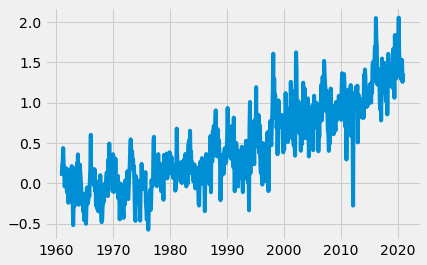

In [20]:
plt.plot(df3)

### 2. Subsetting, wrangling, and cleaning time-series data

In [21]:
# Reset index so that you can use the "Date" column as a filter
data_2 = df3.reset_index()

In [22]:
data_2.head()

,Date,Temp_Change
,,mean
0,1961-01-01,0.093126
1,1961-02-01,0.234981
2,1961-03-01,0.270860
3,1961-04-01,0.438159
4,1961-05-01,0.242043


In [23]:
data_sub = data_2.loc[(data_2['Date'] >= '1980-01-01') & (data_2['Date'] < '2020-06-01')]

I subsetted the data so as to include only the recent 40 years of the data. 

In [24]:
data_sub.shape

(485, 2)

In [25]:
data_sub.head()

,Date,Temp_Change
,,mean
228,1980-01-01,0.125467
229,1980-02-01,0.338014
230,1980-03-01,0.268659
231,1980-04-01,0.324670
232,1980-05-01,0.180698


In [26]:
# Set the "Date" column as the index
from datetime import datetime
data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from Date
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the \"Date\" column.
data_sub.head()

,Temp_Change
,mean
datetime,
1980-01-01,0.125467
1980-02-01,0.338014
1980-03-01,0.268659
1980-04-01,0.324670
1980-05-01,0.180698


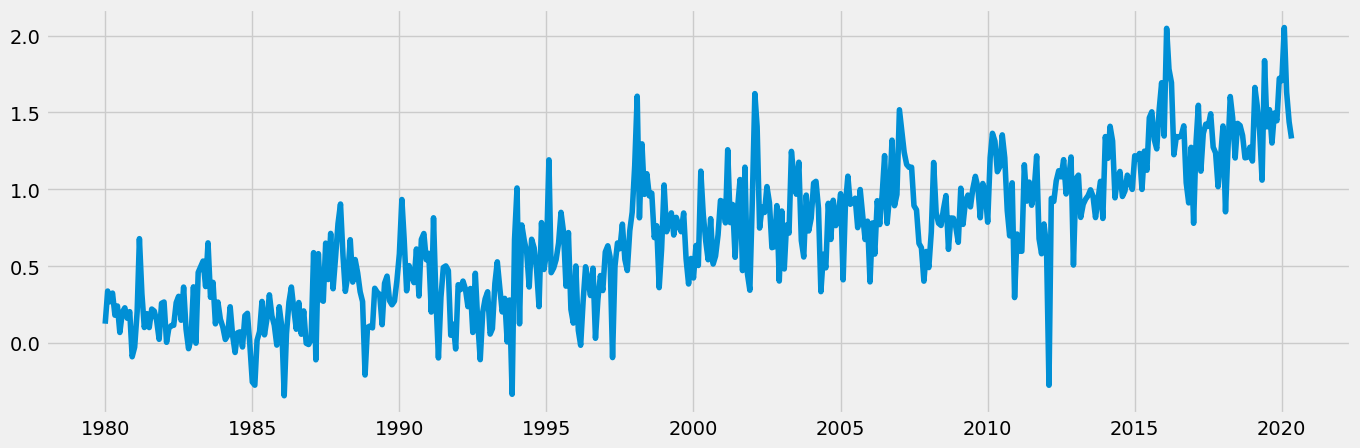

In [27]:
# Plot the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [28]:
# Check for missing values (you shouldn't have any)
data_sub.isnull().sum() 

Temp_Change  mean    0
dtype: int64

In [29]:
# Check for duplicates
dups = data_sub.duplicated()
dups.sum()
# No dups!

0

### 3. Time-series analysis: decomposition

In [30]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [31]:
from pylab import rcParams # This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7

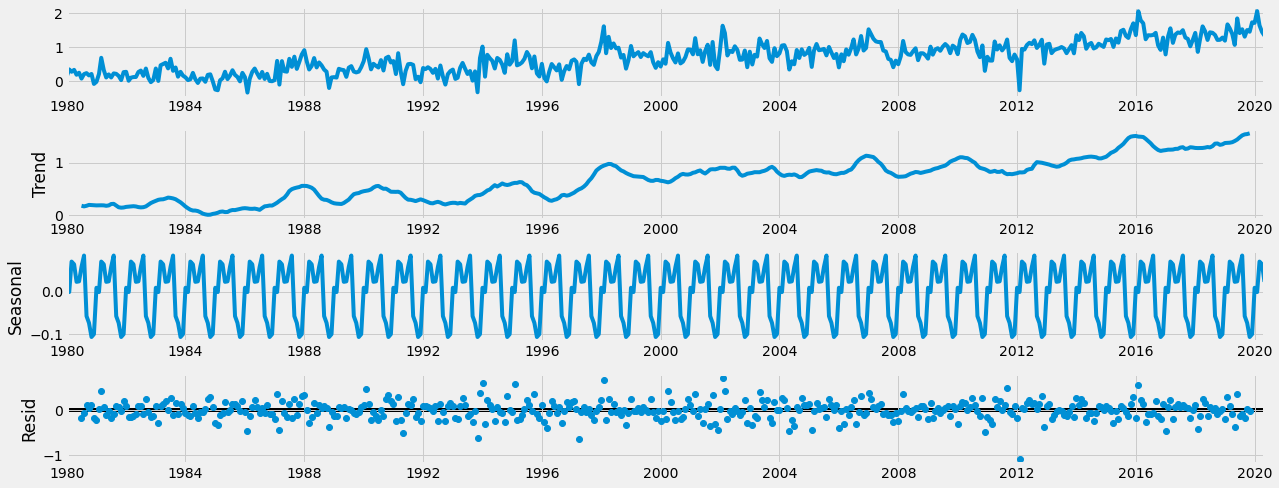

In [32]:
# Plot the separate components
decomposition.plot()
plt.show()

The first chart is the level, which is the data itself, the avg. temp change over the years. 
The second chart is the trend. As my temperature change data is not smoothened, the trend line is different from the level. The Trend line is mostly a upward trend, with little bumps and dips. A major bump is seen around 1998 and big dip was around 1994. There is a steady upward trend after 2017.
The Seasonal chart shows that the data has some seasonality to it.
The Residual chart is what is left of the data after trend and seasonality have been extracted. From the above chart, there is a lot of noise around the data as I didnot smooth the data. 


### 4. Testing for stationarity

In [37]:
from statsmodels.tsa.stattools import adfuller
def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
        result['Critical Value (%s)'%key] = value
    print (result)
    
dickey_fuller(data_sub['Temp_Change'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.215703
p-value                          0.666805
Number of Lags Used             12.000000
Number of Observations Used    472.000000
Critical Value (1%)             -3.444281
Critical Value (5%)             -2.867683
Critical Value (10%)            -2.570042
dtype: float64


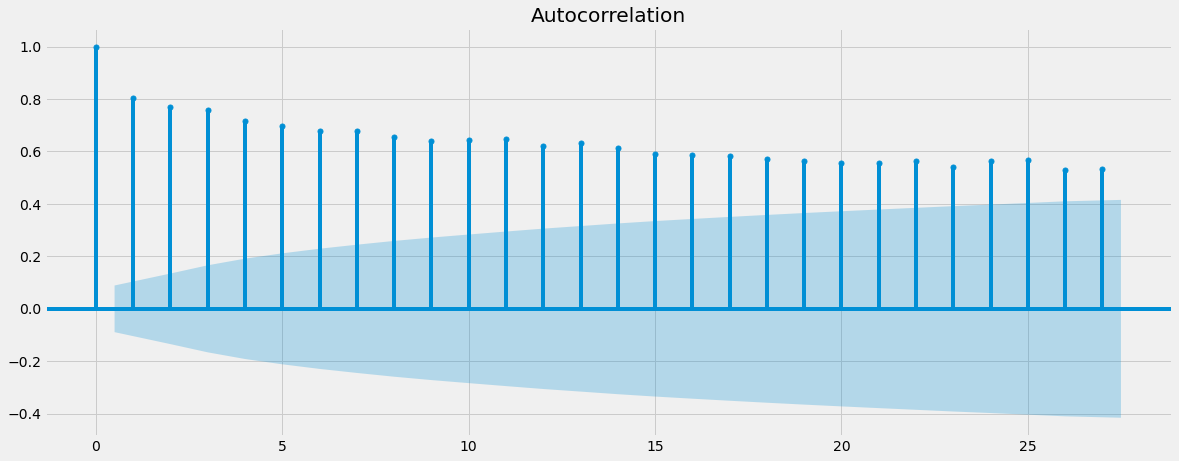

In [38]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(data_sub)
plt.show()

Since the Test Statistic is more than the Critical Value, the I time series data I have is not stationary. The Null Hypothesis cannot be rejected. It makes the data unsuitable for time series forecasting.

### 5. Stationarizing the Average Temperature Change data
   

In [39]:
data_diff = data_sub - data_sub.shift(1)

In [40]:
data_diff.dropna(inplace = True)

In [41]:
data_diff.columns

MultiIndex([('Temp_Change', 'mean')],
           )

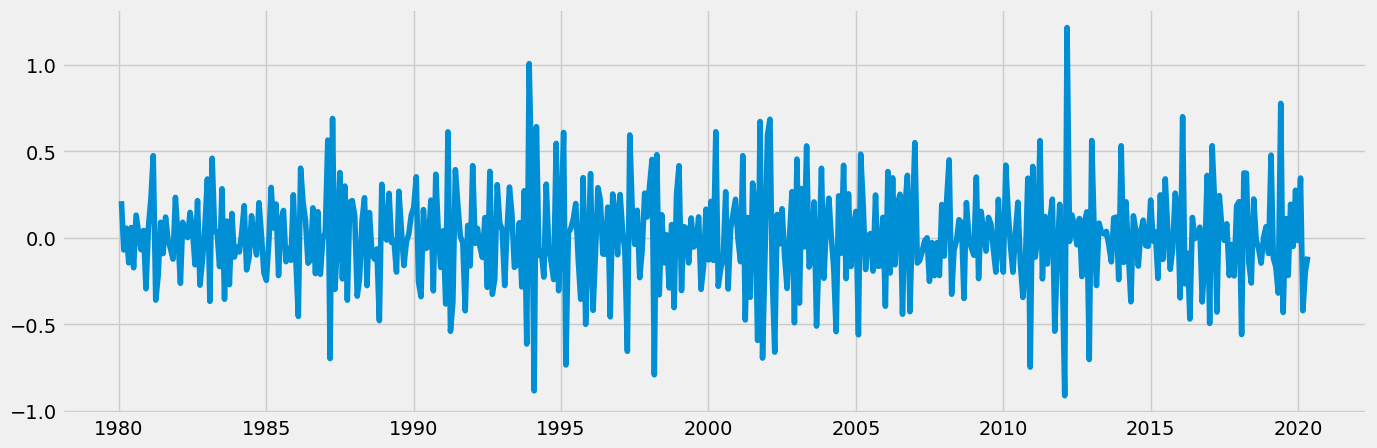

In [42]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [43]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -9.905258e+00
p-value                        3.276407e-17
Number of Lags Used            1.100000e+01
Number of Observations Used    4.720000e+02
Critical Value (1%)           -3.444281e+00
Critical Value (5%)           -2.867683e+00
Critical Value (10%)          -2.570042e+00
dtype: float64


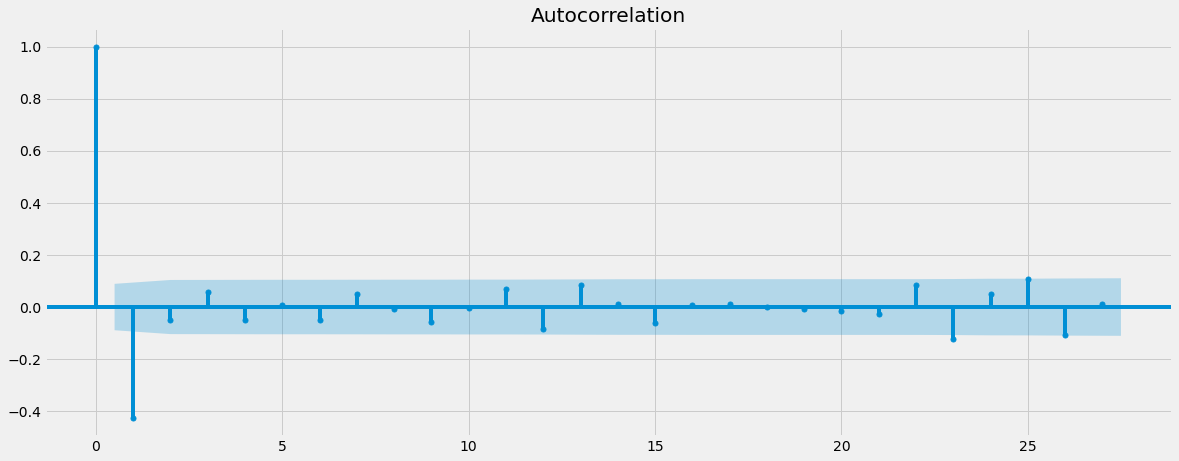

In [44]:
plot_acf(data_diff)
plt.show()

After stationarizing the data, the Test Statistic is now less than the Critical value. The null Hypothesis can be rejected. this makes the data stationary and suitable for time series forcasting.

In [45]:
#exporting the data_diff dataframe
data_diff.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'FAOSTAT_Time_Series.csv'))